In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [3]:
data = pd.read_csv('uber.csv')
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
data.dropna(subset=['dropoff_longitude', 'dropoff_latitude'], inplace=True)

<AxesSubplot: >

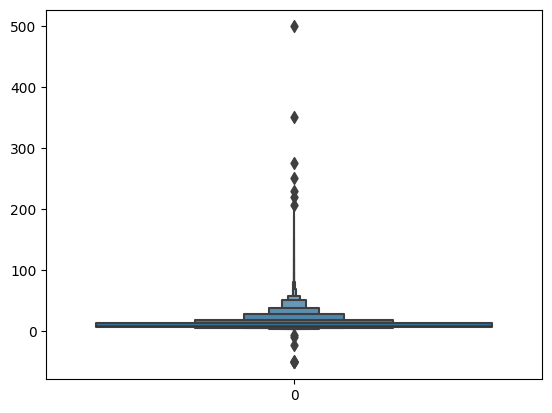

In [6]:
sns.boxenplot(data['fare_amount'])

In [7]:
cov_mat = data.cov()
cov_mat

C:\Users\HP\AppData\Local\Temp\ipykernel_9704\2768883566.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_mat = data.cov()


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,2.564437e+14,93058.452760,42109.851513,-42134.889984,56684.809962,29531.911296,50140.671894
fare_amount,9.305845e+04,98.044851,1.184428,-0.648405,1.167142,-0.741010,0.139404
pickup_longitude,4.210985e+04,1.184428,130.823623,-72.098695,124.982650,-65.774618,-0.006581
pickup_latitude,-4.213489e+04,-0.648405,-72.098695,59.607023,-78.465589,36.846061,-0.016684
dropoff_longitude,5.668481e+04,1.167142,124.982650,-78.465589,172.066387,-81.733638,0.000598
dropoff_latitude,2.953191e+04,-0.741010,-65.774618,36.846061,-81.733638,46.169699,-0.006209
passenger_count,5.014067e+04,0.139404,-0.006581,-0.016684,0.000598,-0.006209,1.920982


C:\Users\HP\AppData\Local\Temp\ipykernel_9704\3495436254.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr(method='pearson')


<AxesSubplot: >

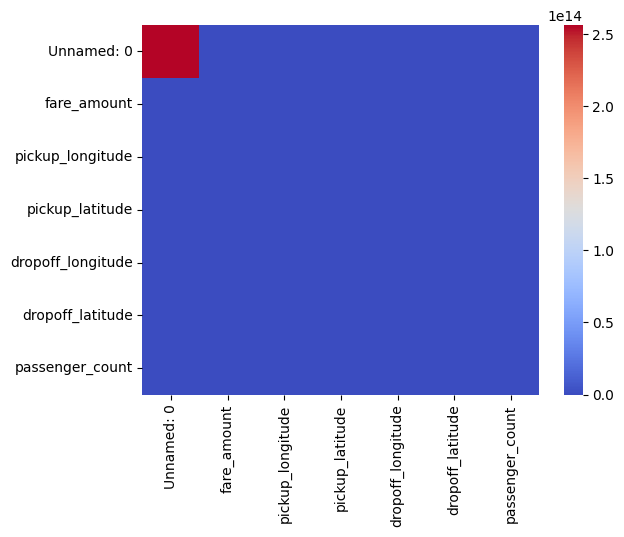

In [8]:
correlation_matrix = data.corr(method='pearson')
sns.heatmap(cov_mat, cmap='coolwarm')
            

In [9]:
x = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = data['fare_amount']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [11]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
Linear = LinearRegression()
Linear.fit(x_train, y_train)
Linear_pred = Linear.predict(x_test)

In [13]:
# Implement Lasso Regression
lasso = Lasso(alpha=1.0)  # You can adjust the alpha parameter
lasso.fit(x_train, y_train)
lasso_predictions = lasso.predict(x_test)

In [14]:
Ridge = Ridge(alpha=0.1)
Ridge.fit(x_train, y_train)
Ridge_pred = Ridge.predict(x_test)